In [8]:
import numpy as np

import src.util as utils
import importlib
importlib.reload(utils)

<module 'src.util' from '/Users/tomas/PycharmProjects/uib-machine-learning/assignment-2/src/util.py'>

In [2]:
X = np.load("./data/emnist_hex_images.npy")
y = np.load("./data/emnist_hex_labels.npy")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Preprocess the data (scaling and dimensionality reduction with PCA)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the CNN
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, solver='adam', random_state=42)
clf.fit(X_train, y_train)

MLPClassifier(random_state=42)

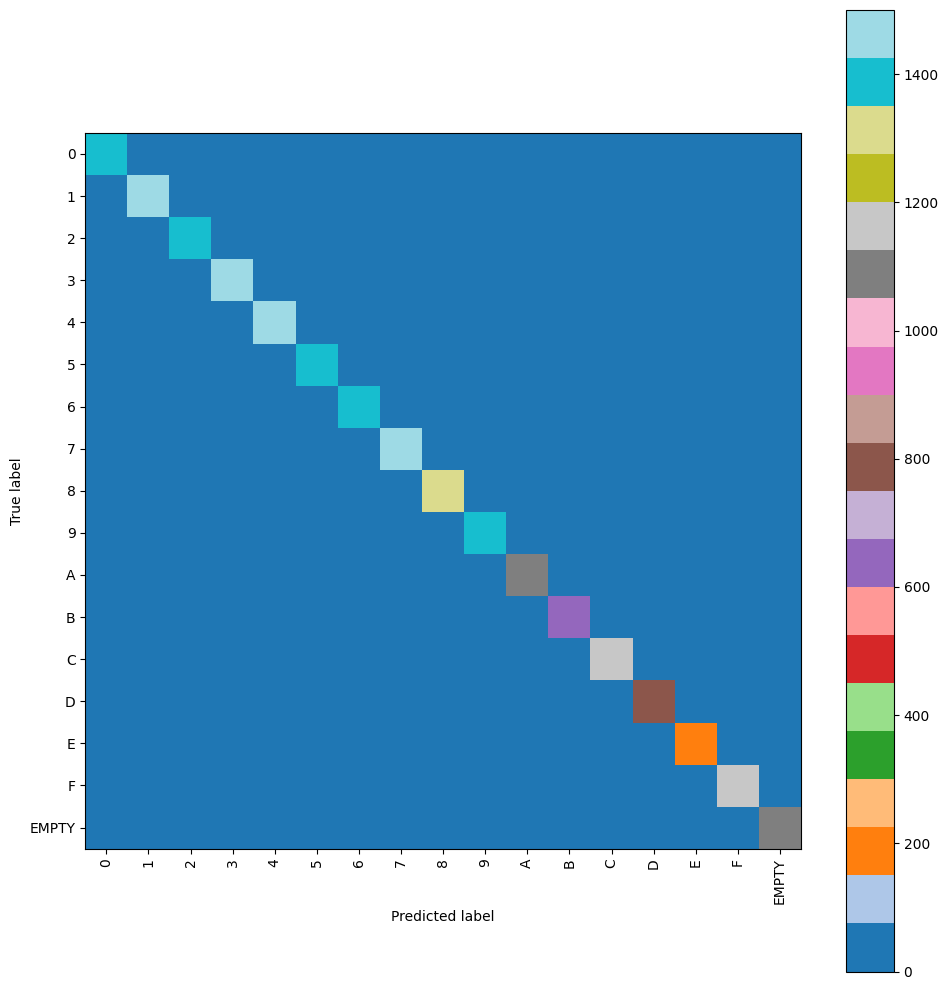

In [12]:
from src.util import generate_confusion_matrix

# Generate predictions on the test data
y_pred = clf.predict(X_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Use our function to generate a confusion matrix image
generate_confusion_matrix(conf_matrix, "confusion_matrix_MLP.png", y_test)


In [14]:
from sklearn.metrics import accuracy_score

# Make predictions using the trained classifier
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9423959927647141
